In [93]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
import random
import csv

with open('./snowFallData/dataSet_N_0.csv', newline='') as f:
    data = list(csv.reader(f))
train_0_x = [x[:-1] for x in data[1:]  if x[-1]!=-1]
train_0_y = [x[-1] for x in data[1:] if x[-1]!=-1]

with open('./snowFallData/dataSet_N_1.csv', newline='') as f:
    data = list(csv.reader(f))
train_1_x = [x[:-1] for x in data[1:]   if x[-1]!=-1]
train_1_y = [x[-1] for x in data[1:]   if x[-1]!=-1]

with open('./snowFallData/dataSet_N_2.csv', newline='') as f:
    data = list(csv.reader(f))
train_2_x = [x[:-1] for x in data[1:]   if x[-1]!=-1]
train_2_y = [x[-1] for x in data[1:]   if x[-1]!=-1]

with open('./snowFallData/dataSet_N_3.csv', newline='') as f:
    data = list(csv.reader(f))
train_3_x = [x[:-1] for x in data[1:]   if x[-1]!=-1]
train_3_y = [x[-1] for x in data[1:]   if x[-1]!=-1]

with open('./snowFallData/valSet_N_0.csv', newline='') as f:
    data = list(csv.reader(f))
test_0_x = [x[:-1] for x in data[1:]  if x[-1]!=-1]
test_0_y = [x[-1] for x in data[1:] if x[-1]!=-1]

with open('./snowFallData/valSet_N_1.csv', newline='') as f:
    data = list(csv.reader(f))
test_1_x = [x[:-1] for x in data[1:]]
test_1_y = [x[-1] for x in data[1:]]

with open('./snowFallData/valSet_N_2.csv', newline='') as f:
    data = list(csv.reader(f))
test_2_x = [x[:-1] for x in data[1:]]
test_2_y = [x[-1] for x in data[1:]]


with open('./snowFallData/valSet_N_3.csv', newline='') as f:
    data = list(csv.reader(f))
test_3_x = [x[:-1] for x in data[1:]   if x[-1]!=-1]
test_3_y = [x[-1] for x in data[1:]   if x[-1]!=-1]



In [89]:
def k_fold_cross(model, k, x_train, y_train):
    error=[]
    for i in range(k):
        low_index=int(i*len(x_train)/k)
        high_index=int((i+1)*len(x_train)/k)
        temp=model.fit(x_train[:low_index]+x_train[high_index:], y_train[:low_index]+y_train[high_index:])
        error.append( 1-temp.score(x_train[low_index:high_index], y_train[low_index:high_index])) 
    return sum(error)/len(error) 


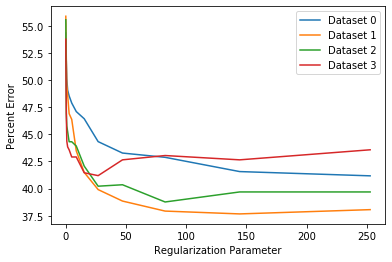

[53.77483443708609, 52.18543046357617, 49.536423841059595, 46.88741721854305, 44.370860927152314, 43.841059602649004, 43.576158940397356, 42.91390728476821, 42.913907284768214, 41.45695364238411, 41.192052980132445, 42.64900662251655, 43.04635761589403, 42.64900662251655, 43.576158940397356]


In [97]:
score_0, score_1, score_2, score_3, x_axis=[], [], [], [], []

for x in range(15):  
    c=0.1*(1.75**x)
    clf = svm.SVC(C=c, kernel='linear')
    score_0.append(k_fold_cross(clf, 5, train_0_x, train_0_y)*100)
    score_1.append(k_fold_cross(clf, 5, train_1_x, train_1_y)*100)
    score_2.append(k_fold_cross(clf, 5, train_2_x, train_2_y)*100)
    score_3.append(k_fold_cross(clf, 5, train_3_x, train_3_y)*100)

    x_axis.append(c)
    
plt.plot(x_axis, score_0, label='Dataset 0')
plt.plot(x_axis, score_1, label='Dataset 1')
plt.plot(x_axis, score_2, label='Dataset 2')
plt.plot(x_axis, score_3, label='Dataset 3')



plt.xlabel('Regularization Parameter')
plt.ylabel('Percent Error')
plt.legend()
plt.show()    
print(score_3)

In [98]:
print(score_1)

[55.89491111885675, 55.36685256186824, 53.64586964098989, 51.92488672011154, 49.54426629487626, 48.621470895782494, 46.9074590449634, 46.378529104217506, 43.47072150575114, 41.48832345765075, 39.90501917044267, 38.84715928895085, 37.92262112234228, 37.66120599512025, 38.0550714534681]


In [91]:
clf = svm.SVC().fit(train_0_x, train_0_y)
print(1-clf.score(test_0_x, test_0_y))
clf = svm.SVC().fit(train_1_x, train_1_y)
print(1-clf.score(test_1_x, test_1_y))
clf = svm.SVC().fit(train_2_x, train_2_y)
print(1-clf.score(test_2_x, test_2_y))
clf = svm.SVC().fit(train_3_x, train_3_y)
print(1-clf.score(test_3_x, test_3_y))

0.525
0.30000000000000004
0.4
0.4


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV


C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(train_3_x, train_3_y)
        classifiers.append((C, gamma, clf))
        
        

# #############################################################################
# Visualization
#
# draw visualization of parameter effects

plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
for (k, (C, gamma, clf)) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_2d_range), len(gamma_2d_range), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)),
              size='medium')

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap=plt.cm.RdBu_r,
                edgecolors='k')
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')

scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))

# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()